# First

In [2]:
from keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=200)

train_input.shape, test_input.shape

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((25000,), (25000,))

In [3]:
len(train_input[0]), len(train_input[1])

(218, 189)

25000은 샘플의 개수를 뜻한다. 내부엔 파이썬 리스트로 저장되고 있다. (길이가 다르기 때문에)

따라서, .shape을 해도 내부 원소들의 크기가 보이진 않는다.

In [4]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


1 은 문장의 시작을 알린다.

자주 보이는 2는 모르는 단어(번호를 안붙여 놓은)이다.

이때 모르는 단어의 기준은 많이 쓰는 기준 top 200 을 했을때 200위 외의 단어이다.

In [5]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


0 -> 부정
1 -> 긍정

In [6]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [7]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

In [8]:
np.mean(lengths), np.median(lengths)

(np.float64(239.00925), np.float64(178.0))

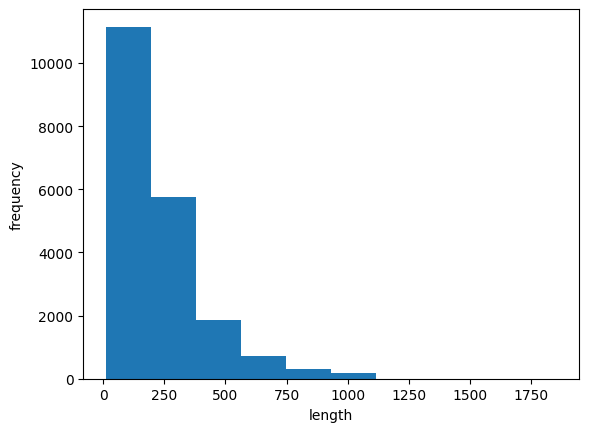

In [9]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel("length")
plt.ylabel("frequency")
plt.show()

In [10]:
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100) # 문장 하나를 100차원으로 표현함.
train_seq.shape

(20000, 100)

```python
train_seq = pad_sequences(train_input, maxlen=100, truncating="post")
```
로 하면 앞부분을 잘라내는게 아니라 뒷부분을 잘라내 앞부분을 남긴다.

In [11]:
train_seq[0]

array([ 10,   4,  20,   9,   2,   2,   2,   5,  45,   6,   2,   2,  33,
         2,   8,   2, 142,   2,   5,   2,  17,  73,  17,   2,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12,   2,  69,   2, 142,  73,
         2,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
         2,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10,   2, 158], dtype=int32)

In [12]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


짤라낸 train_seq를 보면 train_input에서 앞부분을 짤라내고 뒷부분을 남겼다는걸 알 수 있다.

In [13]:
train_seq[5]

array([  0,   0,   0,   0,   1,   2, 195,  19,  49,   2,   2, 190,   4,
         2,   2,   2, 183,  10,  10,  13,  82,  79,   4,   2,  36,  71,
         2,   8,   2,  25,  19,  49,   7,   4,   2,   2,   2,   2,   2,
        10,  10,  48,  25,  40,   2,  11,   2,   2,  40,   2,   2,   5,
         4,   2,   2,  95,  14,   2,  56, 129,   2,  10,  10,  21,   2,
        94,   2,   2,   2,   2,  11, 190,  24,   2,   2,   7,  94,   2,
         2,  10,  10,  87,   2,  34,  49,   2,   7,   2,   2,   2,   2,
         2,   2,   2,  46,  48,  64,  18,   4,   2], dtype=int32)

길이가 짧아서 앞에 패딩 4개가 추가됨.

In [14]:
val_seq = pad_sequences(val_input, maxlen=100)

In [15]:
import keras

model = keras.Sequential()
model.add(keras.layers.Input(shape=(100, 200)))
model.add(keras.layers.SimpleRNN(8))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [16]:
train_one_hot = keras.utils.to_categorical(train_seq)

train_one_hot.shape

(20000, 100, 200)

In [17]:
print(train_one_hot[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


train_seq에서 첫번째 값이 10인 것과 같은 원리.

In [18]:
np.sum(train_one_hot[0][0])

np.float64(1.0)

In [19]:
val_one_hot = keras.utils.to_categorical(val_seq)

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-simplernn-model.keras")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_one_hot, train_target, epochs=100, batch_size=64,
                    validation_data=(val_one_hot, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.5043 - loss: 0.7003 - val_accuracy: 0.5194 - val_loss: 0.6914
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5365 - loss: 0.6888 - val_accuracy: 0.5268 - val_loss: 0.6890
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5512 - loss: 0.6836 - val_accuracy: 0.5468 - val_loss: 0.6845
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5784 - loss: 0.6753 - val_accuracy: 0.5582 - val_loss: 0.6783
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5990 - loss: 0.6657 - val_accuracy: 0.5646 - val_loss: 0.6756
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6127 - loss: 0.6514 - val_accuracy: 0.6010 - val_loss: 0.6582
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6353 - loss: 0.6351 - val_accuracy: 0.6148 - val_loss: 0.6489
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6446 - loss: 0.6273 - 

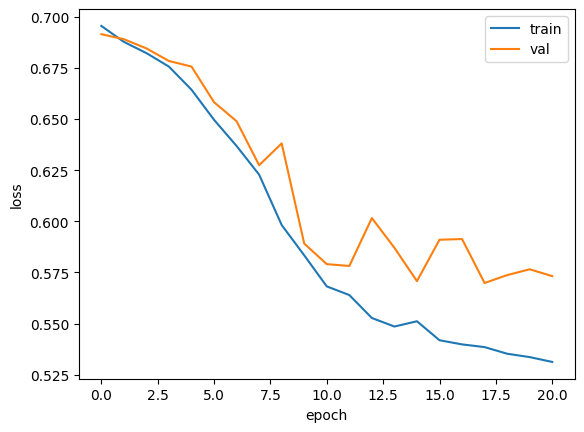

In [22]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [23]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
train_input, train_target, test_size=0.2, random_state=42)

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [24]:
model_emb = keras.Sequential()
model_emb.add(keras.layers.Input(shape=(100,)))
model_emb.add(keras.layers.Embedding(500, 16))
model_emb.add(keras.layers.SimpleRNN(8))
model_emb.add(keras.layers.Dense(1, activation="sigmoid"))
model_emb.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,209 (32.07 KB)

 Trainable params: 8,209 (32.07 KB)

 Non-trainable params: 0 (0.00 B)

RNN parameter : (16 + 8 + 1)*8

500크기의 one hot encoding -> 16크기의 embedding

In [25]:
model_emb.compile(optimizer="adam", loss="binary_crossentropy",
                  metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-embedding-model.keras",
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
restore_best_weights=True)

history = model_emb.fit(train_seq, train_target, epochs=100, batch_size=64,

validation_data=(val_seq, val_target),
callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5293 - loss: 0.6894 - val_accuracy: 0.6608 - val_loss: 0.6343
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6835 - loss: 0.6074 - val_accuracy: 0.6732 - val_loss: 0.6163
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6811 - loss: 0.6030 - val_accuracy: 0.7158 - val_loss: 0.5750
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7050 - loss: 0.5754 - val_accuracy: 0.7308 - val_loss: 0.5571
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7221 - loss: 0.5620 - val_accuracy: 0.6628 - val_loss: 0.6154
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7339 - loss: 0.5485 - val_accuracy: 0.7296 - val_loss: 0.5573
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7183 - loss: 0.5495 - val_accuracy: 0.6072 - val_loss: 0.6490


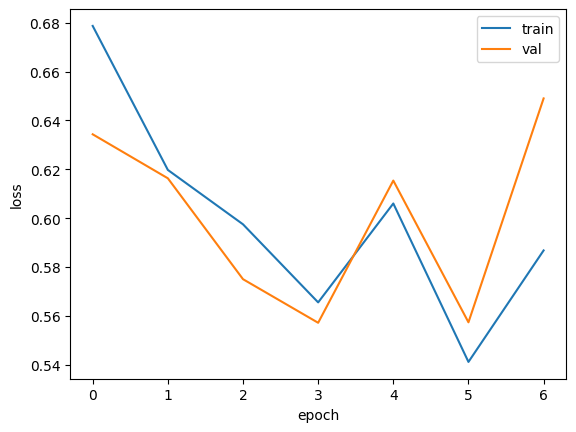

In [26]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [28]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# Load the previously saved model (assuming 'best-embedding-model.keras' was the last trained)
model = keras.models.load_model('best-embedding-model.keras')

# The number of words used when loading the IMDB data for this model
NUM_WORDS = 500

# Get the word index mapping from Keras IMDB dataset
word_index = imdb.get_word_index()

# Create a word-to-integer mapping for new sentences. We shift indices by 3
# because 0 is for padding, 1 for start of sequence, and 2 for unknown words.
# Words with original index >= NUM_WORDS - 3 (after shifting) will be treated as unknown (2).
word_to_int = {}
for word, i in word_index.items():
    # Only include words within the vocabulary size, adjusting for the 3 special tokens
    if i < NUM_WORDS - 3:
        word_to_int[word] = i + 3
    else:
        word_to_int[word] = 2 # Map out-of-vocabulary words to the 'unknown' token

# Define a function to preprocess a new review text
def preprocess_review(text, word_to_int_map, maxlen=100):
    words = text.lower().split() # Convert to lowercase and split into words

    # Start the sequence with the 'start of sequence' token (1)
    # Then, map each word to its integer ID, using '2' for unknown words
    encoded_review = [1] + [word_to_int_map.get(word, 2) for word in words]

    # Pad the sequence to the specified maxlen. `truncating='pre'` is the default
    # and matches how `train_seq` was created earlier.
    padded_review = pad_sequences([encoded_review], maxlen=maxlen, truncating='pre')
    return padded_review

# --- Your sentence for prediction ---
my_sentence = "This movie was absolutely fantastic! I loved every single moment of it. Highly recommend."
# You can change the sentence below to test different reviews:
# my_sentence = "This movie was terrible. I hated it and it was a waste of time."

# Preprocess your sentence
processed_sentence = preprocess_review(my_sentence, word_to_int, maxlen=100)

# Make a prediction using the loaded model
prediction = model.predict(processed_sentence)

# Interpret the prediction (output is a probability between 0 and 1)
sentiment = "Positive" if prediction[0][0] > 0.5 else "Negative"
probability = prediction[0][0]

print(f"Sentence: {my_sentence}")
print(f"Predicted sentiment: {sentiment} (Probability: {probability:.4f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
Sentence: This movie was absolutely fantastic! I loved every single moment of it. Highly recommend.
Predicted sentiment: Negative (Probability: 0.2887)


성능 똥쓰레기 ㅋㅋ

# Second

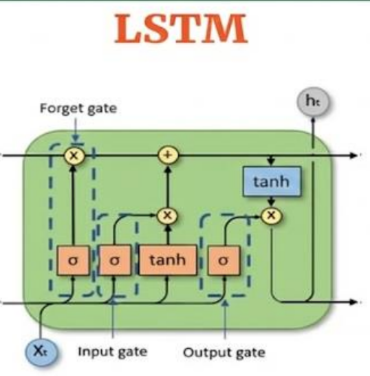

hidden과 x_t가 들어가는 tanh와 같이 주황색 노드는 Weight가 곱해져서

$W_1 (hidden) + W_2 x_t + (bias)$ 이고, 파란색은

$tanh(Cell)$이다.

LSTM은 일반 RNN의 연산량 4배이지만 실제 4배 느려지는 것은 아닌데, 연산의 의존성이 없기 때문에 병렬 처리가 가능해서 막 느려지지 않는다.

위 오른쪽 출구가 장기 기억, 아래 오른쪽은 단기 hidden.

마지막 tanh에서 weight를 얼마나 주는가가 장기 기억을 얼마나 반영할 지 판단함.

특징은 LSTM은 내부적으로만 처리하는 Cell state가 존재한다는 것이다.

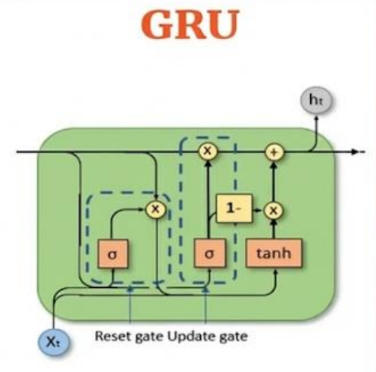

Reset Gate : hidden state를 이번 출력에 얼마나 반영할 것이냐

Update Gate :

GRU : LSTM에서 굳이 Cell state를 만들지 않고 하나로 합쳐버린다. 즉, Forget Gate, Input Gate를 Update Gate 하나로 합침.

1- 박스 : 1 - (alpha) 로 반영한 것에 반대 수준으로 업데이트

In [29]:
from keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
train_input, train_target, test_size=0.2, random_state=42)

In [31]:
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [33]:
import keras

model_lstm = keras.Sequential()
model_lstm.add(keras.layers.Input(shape=(100,)))
model_lstm.add(keras.layers.Embedding(500, 16))
model_lstm.add(keras.layers.LSTM(8))
model_lstm.add(keras.layers.Dense(1, activation="sigmoid"))
model_lstm.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 8)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model_lstm.compile(optimizer="adam", loss="binary_crossentropy",
                   metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-lstm-model.keras",
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model_lstm.fit(train_seq, train_target, epochs=100, batch_size=64,
                         validation_data=(val_seq, val_target),
                         callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5874 - loss: 0.6571 - val_accuracy: 0.7332 - val_loss: 0.5345
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7644 - loss: 0.4990 - val_accuracy: 0.7770 - val_loss: 0.4784
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7939 - loss: 0.4543 - val_accuracy: 0.7952 - val_loss: 0.4480
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7914 - loss: 0.4481 - val_accuracy: 0.7978 - val_loss: 0.4407
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8087 - loss: 0.4201 - val_accuracy: 0.7990 - val_loss: 0.4328
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8080 - loss: 0.4198 - val_accuracy: 0.7926 - val_loss: 0.4425
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8087 - loss: 0.4137 - val_accuracy: 0.8046 - val_loss: 0.4312
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8146 - loss: 0.4040 - val_a

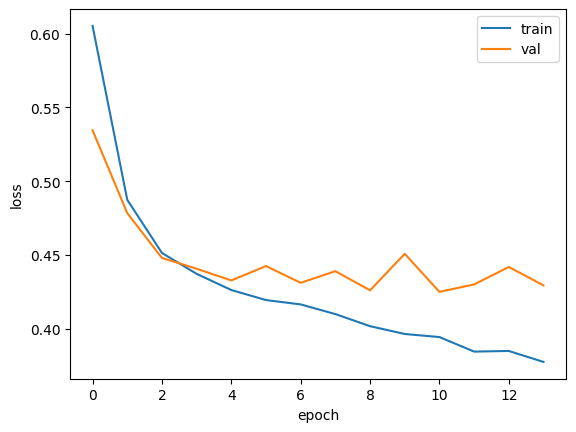

In [36]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [43]:
model_dropout = keras.Sequential()
model_dropout.add(keras.layers.Input(shape=(100,)))
model_dropout.add(keras.layers.Embedding(500, 16))
model_dropout.add(keras.layers.LSTM(8, dropout=0.2))
model_dropout.add(keras.layers.Dense(1, activation="sigmoid"))
model_dropout.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 8)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model_dropout.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint("best-dropout-model.keras", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
restore_best_weights=True)

history = model_dropout.fit(train_seq, train_target, epochs=100, batch_size=64,
                            validation_data=(val_seq, val_target),
                            callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6060 - loss: 0.6498 - val_accuracy: 0.7620 - val_loss: 0.5118
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7745 - loss: 0.4898 - val_accuracy: 0.7904 - val_loss: 0.4516
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7941 - loss: 0.4477 - val_accuracy: 0.7780 - val_loss: 0.4657
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8029 - loss: 0.4339 - val_accuracy: 0.8014 - val_loss: 0.4327
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8060 - loss: 0.4247 - val_accuracy: 0.7952 - val_loss: 0.4400
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8108 - loss: 0.4174 - val_accuracy: 0.8000 - val_loss: 0.4467
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8121 - loss: 0.4127 - val_accuracy: 0.8010 - val_loss: 0.4327
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8146 - loss: 0.4019 - val_a

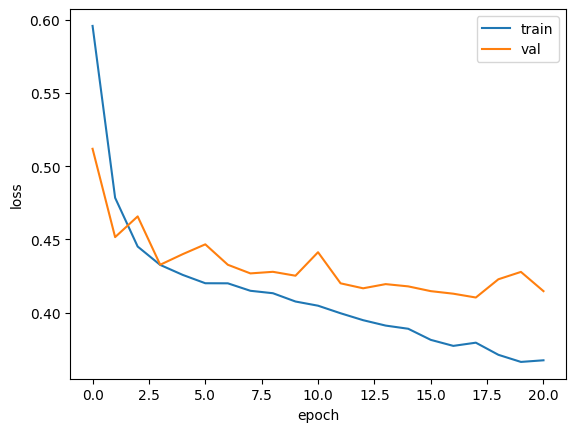

In [45]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [46]:
model_2lstm = keras.Sequential()
model_2lstm.add(keras.layers.Input(shape=(100,)))
model_2lstm.add(keras.layers.Embedding(500, 16))
model_2lstm.add(keras.layers.LSTM(8, dropout=0.2, return_sequences=True))
model_2lstm.add(keras.layers.LSTM(8, dropout=0.2))
model_2lstm.add(keras.layers.Dense(1, activation='sigmoid'))
model_2lstm.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 8)         │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 8)              │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

$ (8 (Input) + 8 (h_t) + 1 (bias)) × 8 × 4 = 544 $

토큰의 길이는 모델 Parameter개수에 영향을 주지 않는다.

토큰의 길이는 RNN 내부에서 얼마나 순환하며 반복할지를 결정할 뿐임

In [49]:
model_2lstm.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint("best-2lstm-model.keras",
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model_2lstm.fit(train_seq, train_target, epochs=100, batch_size=64,
                          validation_data=(val_seq, val_target),
                          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5983 - loss: 0.6537 - val_accuracy: 0.7224 - val_loss: 0.5541
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7765 - loss: 0.4849 - val_accuracy: 0.7900 - val_loss: 0.4543
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7905 - loss: 0.4532 - val_accuracy: 0.7858 - val_loss: 0.4527
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7994 - loss: 0.4408 - val_accuracy: 0.7998 - val_loss: 0.4343
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8045 - loss: 0.4309 - val_accuracy: 0.7752 - val_loss: 0.4690
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8097 - loss: 0.4186 - val_accuracy: 0.8010 - val_loss: 0.4309
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8137 - loss: 0.4101 - val_accuracy: 0.8080 - val_loss: 0.4332
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8143 - loss: 0.4093 - 

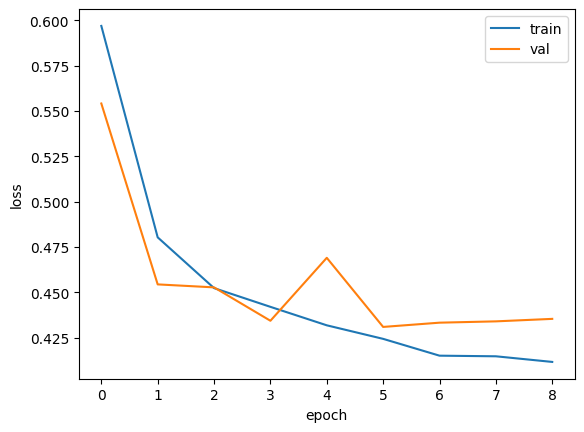

In [50]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## GRU

In [52]:
model_gru = keras.Sequential()
model_gru.add(keras.layers.Input(shape=(100,)))
model_gru.add(keras.layers.Embedding(500, 16))
model_gru.add(keras.layers.GRU(8, dropout=0.2))
model_gru.add(keras.layers.Dense(1, activation="sigmoid"))
model_gru.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 8)              │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,633 (33.72 KB)

 Trainable params: 8,633 (33.72 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model_gru.compile(optimizer="adam", loss="binary_crossentropy",
                  metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-gru-model.keras",
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model_gru.fit(train_seq, train_target, epochs=100, batch_size=64,
                        validation_data=(val_seq, val_target),
                        callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5582 - loss: 0.6769 - val_accuracy: 0.7476 - val_loss: 0.5132
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7570 - loss: 0.5045 - val_accuracy: 0.7664 - val_loss: 0.4873
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7887 - loss: 0.4599 - val_accuracy: 0.7854 - val_loss: 0.4537
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8058 - loss: 0.4284 - val_accuracy: 0.7954 - val_loss: 0.4414
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8021 - loss: 0.4321 - val_accuracy: 0.8032 - val_loss: 0.4365
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8082 - loss: 0.4218 - val_accuracy: 0.7992 - val_loss: 0.4362
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8087 - loss: 0.4184 - val_accuracy: 0.8038 - val_loss: 0.4320
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8070 - loss: 0.4215 - val_a

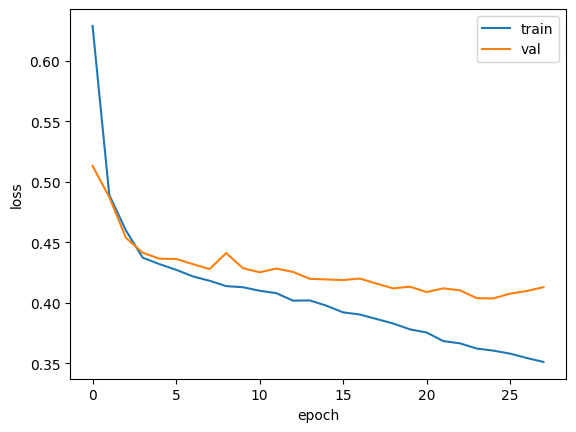

In [54]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [57]:
test_seq = pad_sequences(test_input, maxlen=100)
best_model_rnn = keras.models.load_model("best-embedding-model.keras")
best_model_lstm = keras.models.load_model("best-2lstm-model.keras")
best_model_gru = keras.models.load_model("best-gru-model.keras")
best_model_rnn.evaluate(test_seq, test_target)
best_model_lstm.evaluate(test_seq, test_target)
best_model_gru.evaluate(test_seq, test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7408 - loss: 0.5487
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8030 - loss: 0.4311
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8200 - loss: 0.3927


[0.3908822536468506, 0.8209599852561951]